In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Marketing_Campaign_Data_5000.xlsx") #Reading the csv

In [3]:
data.head() #Displaying the first 5 rows of the dataset


,Customer ID,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Buy or Not Buy,Product Category Preference
0,1,56,54,70,Female,No,0,Yes,Buy,Home Appliances
1,2,46,97,97,Female,No,0,No,Buy,Cosmetics
2,3,32,90,55,Female,No,2,Yes,Buy,Cosmetics
3,4,60,58,1,Male,No,0,Yes,Not Buy,Apparel
4,5,25,48,70,Female,No,3,No,Not Buy,Apparel


In [4]:
data.columns #printing the columns for later use

Index(['Customer ID', 'Age', 'Income (in $K)', 'Spending Score (1-100)',
       'Gender', 'Married', 'Children', 'Promotion Response', 'Buy or Not Buy',
       'Product Category Preference'],
      dtype='object')

In [5]:
data.isna().sum() #just to check any null values

,0
Customer ID,0
Age,0
Income (in $K),0
Spending Score (1-100),0
Gender,0
Married,0
Children,0
Promotion Response,0
Buy or Not Buy,0
Product Category Preference,0


In [6]:
data.shape #Printing the shape of the dataset

(5000, 10)

In [7]:
data.dtypes #Printing the data types of each column

,0
Customer ID,int64
Age,int64
Income (in $K),int64
Spending Score (1-100),int64
Gender,object
Married,object
Children,int64
Promotion Response,object
Buy or Not Buy,object
Product Category Preference,object


In [8]:
data[['Age', 'Income (in $K)', 'Spending Score (1-100)']].describe()         #Getting an overview of the distribution of these features

,Age,Income (in $K),Spending Score (1-100)
count,5000.00000,5000.000000,5000.000000
mean,41.16820,89.560600,50.861800
std,13.53105,34.423563,28.934833
min,18.00000,30.000000,1.000000
25%,29.00000,59.000000,25.000000
50%,41.00000,89.000000,52.000000
75%,53.00000,119.000000,76.000000
max,64.00000,149.000000,100.000000


Providing insights to better understand the features and our data

Histogram by Age

In [9]:
#Using pxplot for histogram
#We are using pxplot as it is more interactive than other plots
ageHist = px.histogram(data, x="Age", nbins = 10, title = "Age Distribution Table", width = 800, height = 400)

ageHist.update_traces(marker=dict(line=dict(color='black', width=1)))

ageHist.update_layout(xaxis=dict(tickvals=[20, 25, 30, 35, 40, 45, 50, 55, 60]))

ageHist.show()

Histogram By Income

In [10]:

# Histogram for Income frequency table and Income
salaryHist = px.histogram(data,
                          x='Income (in $K)',
                          nbins=15,  # Set the number of bins
                          title="Income Frequency Table with Bins",
                          color_discrete_sequence=['blue'], width = 800, height = 400)

# Update traces to make bars clearer
salaryHist.update_traces(marker=dict(line=dict(color='black', width=1)))
salaryHist.update_layout(xaxis=dict(tickvals=[40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]))


salaryHist.show()




In [11]:
# Box plot for Age distribution
ageBox = px.box(data, x="Age", title = "Box plot for Age")  # px helps with interactiveness
ageBox.show()

In [12]:
#Box plot for Age distribution by Gender
ageGenBox = px.box(data, x="Gender", y="Age", color="Gender", title="Age Distribution by Gender")
ageGenBox.show()

###Put vales on the charts



In [13]:
#Box plot for Income levels
incBox = px.box(data, x = "Income (in $K)", title = "Income Box Plot")
incBox.show()

In [14]:
#Box plot for Spending score
spscoreBox = px.box(data, x = 'Spending Score (1-100)', title = "Spending Score Box Plot")
spscoreBox.show()

In [15]:

fig = px.imshow(data.corr(numeric_only=True),   #FINDING correlation between variables
                text_auto=True,
                aspect="auto",
                title="Correlation Matrix",
                labels={'color':'Correlation'})

fig.show()  # Show the figure

In [16]:
#defining the bins
bins = [18, 24, 29, 34, 39, 44, 49, 54, 59, 64]
#defining the labels where the bins will be located
labels = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64"]

# Grouping by age intervals and 'Buy or Not Buy', to get the counts
age_buy_group = data.groupby([pd.cut(data['Age'], bins=bins, labels=labels, right=True), 'Buy or Not Buy'], observed=True).size().reset_index(name='Count')

# Plotting the bar chart
fig = px.bar(age_buy_group,
             x='Age',  # Age intervals on the x-axis
             y='Count',  # Counts on the y-axis
             color='Buy or Not Buy',  # Differentiating buying behavior
             title='Buying vs Not Buying in Each Age Group',
             barmode='group',
             labels={'Age': 'Age Interval', 'Count': 'Number of People', 'Buy or Not Buy': 'Purchase Decision'},
             text='Count')  # Display counts on top of bars

# Update layout to ensure text is displayed clearly
fig.update_layout(
    xaxis_title='Age Interval',
    yaxis_title='Number of People',
    legend_title='Purchase Decision',
    uniformtext_minsize=8,  # Minimum size for text
    uniformtext_mode='hide',  # Hide text if it overlaps
)

# Show the chart
fig.show()


<ipython-input-17-0063dd6a2ec8>:11: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



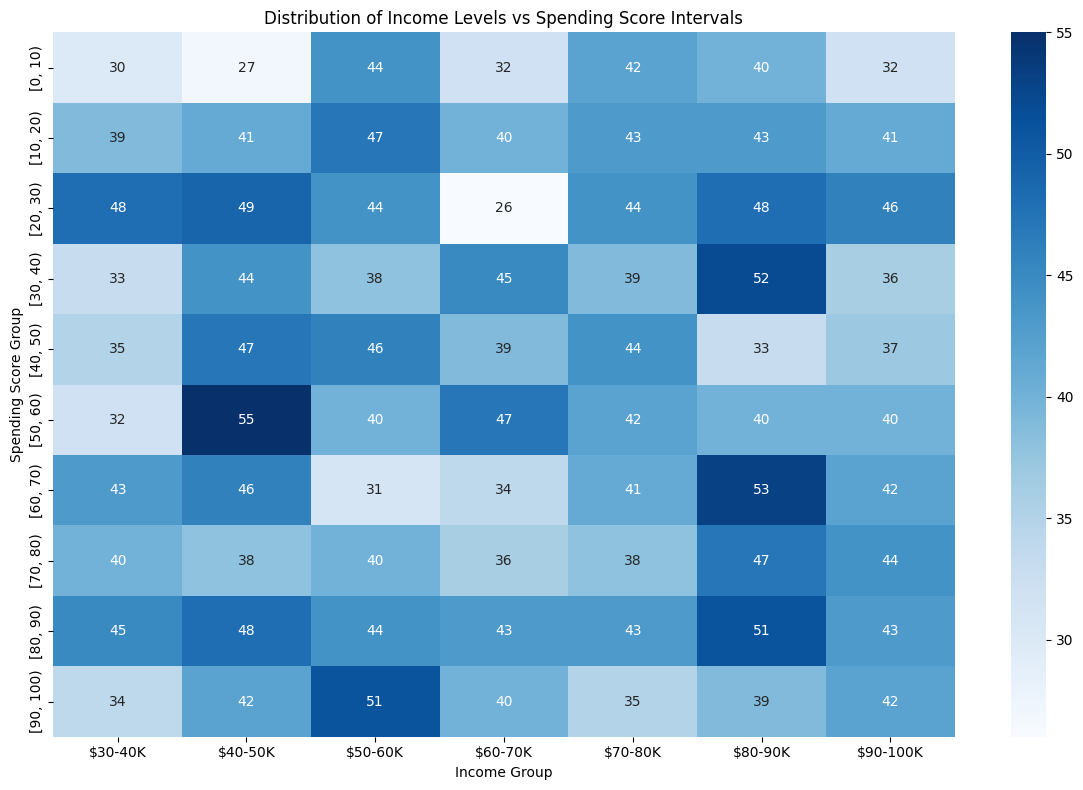

In [17]:
# Define income and spending score bins and labels
income_bins = range(30, 101, 10)  # Income bins from 30K to 100K with 10K intervals
spending_bins = range(0, 101, 10)  # Spending score bins from 0 to 100 with 10-point intervals
income_labels = [f"${i}-{i+10}K" for i in income_bins[:-1]]

# Create 'Income Group' and 'Spending Score Group' columns by cutting the respective columns into bins
data['Income Group'] = pd.cut(data['Income (in $K)'], bins=income_bins, labels = income_labels,right=False)
data['Spending Score Group'] = pd.cut(data['Spending Score (1-100)'], bins=spending_bins, right=False)

# Creating pivot table with counts for each combination of income and spending score intervals
heatmap_data = data.pivot_table(index='Spending Score Group', columns='Income Group', aggfunc='size', fill_value=0)

#plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")

plt.title('Distribution of Income Levels vs Spending Score Intervals') #title
plt.xlabel('Income Group') #xaxis
plt.ylabel('Spending Score Group') #yaxis

plt.tight_layout()
plt.show()


<ipython-input-18-129a78ed2126>:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



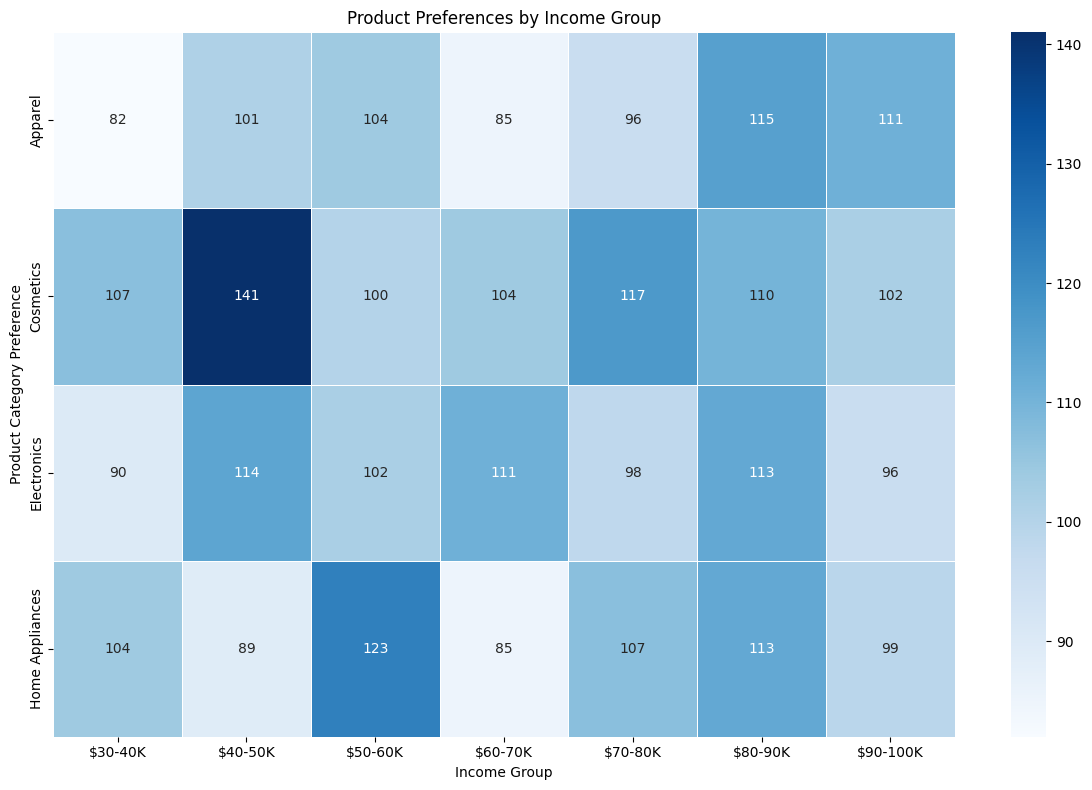

In [18]:
# Create a pivot table with counts of product preferences for each income group
heatmap_data = data.pivot_table(index='Product Category Preference', columns='Income Group', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

plt.title('Product Preferences by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Product Category Preference')

plt.tight_layout()
plt.show()


In [19]:
product_counts = data.groupby(['Product Category Preference', 'Gender']).size().reset_index(name='Counts')

# creating a bar graph
bar_graph = px.bar(product_counts,
                   x='Product Category Preference',
                   y='Counts',
                   color='Gender',
                   barmode='group',  # Group bars by product category
                   title='Product Purchases by Gender',
                   labels={'Counts': 'Number of Purchases', 'Product Category Preference': 'Product Category'},
                   text='Counts',  # Display counts on top of the bars for readability
                   color_discrete_map={'Male': 'blue', 'Female': 'orange'})  # Custom colors for gender

bar_graph.update_layout(xaxis_title='Product Category',
                        yaxis_title='Number of Purchases',
                        legend_title='Gender',
                        yaxis=dict(title='Number of Purchases', autorange=True))

bar_graph.show()


In [20]:
age_product_count = data.groupby([pd.cut(data['Age'], bins=bins, labels=labels), 'Product Category Preference'], observed = True).size().reset_index(name='Count')

# We create an interactive bar chart using Plotly Express
fig = px.bar(age_product_count,
             x='Age',
             y='Count',
             color='Product Category Preference',
             title='Product Preferences by Age Group',
             labels={'Product Category Preference': 'Product Category'},
             barmode='stack',  # Stacked bars for each product category
             text='Count')  # It will show the count on each of the bars


fig.update_layout(xaxis_title='Age Group',
                  yaxis_title='Number of Products Bought',
                  legend_title_text='Product Category',
                  hovermode='x')

# Show the interactive chart
fig.show()


In [21]:
#group by married and prod
married_product_counts = data.groupby(['Married', 'Product Category Preference']).size().reset_index(name='Counts')

bar_graph = px.bar(married_product_counts,
                   x='Product Category Preference',
                   y='Counts',
                   color='Married',
                   barmode='group',
                   title='Product Preferences by Marital Status',
                   labels={'Counts': 'Number of Purchases', 'Product Category Preference': 'Product Category'},
                   text='Counts')

bar_graph.update_layout(xaxis_title='Product Category',
                        yaxis_title='Number of Purchases',
                        legend_title='Marital Status',
                        yaxis=dict(title='Number of Purchases', autorange=True))

bar_graph.show()


In [22]:
#parents
data['Parental Status'] = data['Children'].apply(lambda x: 'Parent' if x > 0 else 'Non-Parent')
#group by parent and product
parent_product_counts = data.groupby(['Parental Status', 'Product Category Preference']).size().reset_index(name='Counts')

bar_graph = px.bar(parent_product_counts,
                   x='Product Category Preference',
                   y='Counts',
                   color='Parental Status',
                   barmode='group',
                   title='Product Preferences by Parental Status',
                   labels={'Counts': 'Number of Purchases', 'Product Category Preference': 'Product Category'},
                   text='Counts')

bar_graph.update_layout(xaxis_title='Product Category',
                        yaxis_title='Number of Purchases',
                        legend_title='Parental Status',
                        yaxis=dict(title='Number of Purchases', autorange=True))
bar_graph.show()


In [23]:
parents_data = data[data['Children'] > 0]

# Group data by income and product category for parents only
product_counts = data.groupby(['Income Group', 'Product Category Preference']).size().reset_index(name='Counts')

bar_graph_income = px.bar(product_counts,
                          x='Income Group',
                          y='Counts',
                          color='Product Category Preference',
                          title='Product Preferences by Income Group (Parents Only)',
                          labels={'Income Group': 'Income Group', 'Counts': 'Number of Purchases'},
                          text='Counts')

bar_graph_income.show()


<ipython-input-23-7830856fb302>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [24]:
# Define age groups
age_bins = [18, 24, 29, 34, 39, 44, 49, 54, 59, 64]
age_labels = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64"]


data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

promotion_age_distribution = data.groupby(['Age Group', 'Promotion Response']).size().reset_index(name='Counts')

pivot_table = promotion_age_distribution.pivot(index='Age Group', columns='Promotion Response', values='Counts').fillna(0)

# crating line chart
line_chart = px.line(pivot_table,
                     x=pivot_table.index,
                     y=pivot_table.columns,
                     title='Promotion Response by Age Group',
                     labels={'value': 'Number of Responses', 'Age Group': 'Age Group'},
                     markers=True)

line_chart.update_layout(yaxis_title='Number of Responses',
                         xaxis_title='Age Group',
                         legend_title='Promotion Response',
                         xaxis=dict(tickmode='linear'))

line_chart.show()


<ipython-input-24-893e3ea1f05d>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [25]:
# Grouping data by product category & promotion response
promotion_by_product = data.groupby(['Product Category Preference', 'Promotion Response']).size().reset_index(name='Counts')

# Calculateing total counts for each product category
total_counts = promotion_by_product.groupby('Product Category Preference')['Counts'].transform('sum')

promotion_by_product['Percentage'] = (promotion_by_product['Counts'] / total_counts) * 100 # getting percentages

#barchart
grouped_bar_product_promotion = px.bar(promotion_by_product,
                                        x='Product Category Preference',
                                        y='Counts',
                                        color='Promotion Response',
                                        title='Promotion Response by Product Category Preference',
                                        labels={'Product Category Preference': 'Product Category',
                                                'Counts': 'Number of Responses'},
                                        text='Percentage',
                                        barmode='group')

grouped_bar_product_promotion.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

grouped_bar_product_promotion.show()


In [26]:
#group married and promotion repsonse
promotion_by_marital_status = data.groupby(['Married', 'Promotion Response']).size().reset_index(name='Counts')

bar_chart_marital_promotion = px.bar(promotion_by_marital_status,
                                      x='Married',
                                      y='Counts',
                                      color='Promotion Response',
                                      barmode='group',
                                      title='Promotion Response by Marital Status',
                                      labels={'Counts': 'Number of Responses',
                                              'Married': 'Marital Status'},
                                      text='Counts',
                                      color_discrete_map={'Yes': 'blue', 'No': 'orange'})

bar_chart_marital_promotion.update_layout(
    title_font_size=18,
    xaxis_title='Marital Status',
    yaxis_title='Number of Responses',
    legend_title='Promotion Response',
    yaxis=dict(title='Number of Responses', autorange=True)
)

# Show the bar chart
bar_chart_marital_promotion.show()


In [27]:
#grouping by gender and promtion response
promotion_by_gender = data.groupby(['Gender', 'Promotion Response']).size().reset_index(name='Counts')

bar_chart_gender_promotion = px.bar(promotion_by_gender,
                                     x='Gender',
                                     y='Counts',
                                     color='Promotion Response',
                                     barmode='group',
                                     title='Promotion Response by Gender',
                                     labels={'Counts': 'Number of Responses',
                                             'Gender': 'Gender'},
                                     text='Counts',
                                     color_discrete_map={'Yes': 'blue', 'No': 'orange'})

bar_chart_gender_promotion.update_layout(
    title_font_size=18,
    xaxis_title='Gender',
    yaxis_title='Number of Responses',
    legend_title='Promotion Response',
    yaxis=dict(title='Number of Responses', autorange=True),
    xaxis=dict(tickmode='linear')
)

bar_chart_gender_promotion.show()


In [28]:
#having children
parents_data = data[data['Children'] > 0]

parents_data['Income Group'] = pd.cut(parents_data['Income (in $K)'], bins=income_bins, labels=income_labels, right=False)

# Group the data by Income Group and Product Category Preference
product_interaction_parents = parents_data.groupby(['Income Group', 'Product Category Preference']).size().reset_index(name='Counts')

# Create a grouped bar chart for Product Type by Income Group (for Parents Only)
bar_chart_parents_interaction = px.bar(product_interaction_parents,
                                        x='Income Group',
                                        y='Counts',
                                        color='Product Category Preference',  # Different bars for each product type
                                        barmode='group',  # Group bars by product type
                                        title='Product Preferences by Income Level Among Parents',
                                        labels={'Counts': 'Number of Responses',
                                                'Income Group': 'Income Level'},
                                        text='Counts')  # Display counts on top of the bars

# Customize the layout to enhance visuals
bar_chart_parents_interaction.update_layout(
    title_font_size=18,
    xaxis_title='Income Level',
    yaxis_title='Number of Responses',
    legend_title='Product Category',
    yaxis=dict(title='Number of Responses', autorange=True)
)

# Show the bar chart
bar_chart_parents_interaction.show()


<ipython-input-28-3ed253415987>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-3ed253415987>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:
# Group the data by Number of Children and Product Category Preference
product_interaction_parents = parents_data.groupby(['Children', 'Product Category Preference']).size().reset_index(name='Counts')

bar_chart_children_interaction = px.bar(product_interaction_parents,
                                         x='Children',
                                         y='Counts',
                                         color='Product Category Preference',
                                         barmode='group',
                                         title='Product Preferences by Number of Children Among Parents',
                                         labels={'Counts': 'Number of Responses',
                                                 'Children': 'Number of Children'},
                                         text='Counts')

bar_chart_children_interaction.update_layout(
    title_font_size=18,
    xaxis_title='Number of Children',
    yaxis_title='Number of Responses',
    legend_title='Product Category',
    yaxis=dict(title='Number of Responses', autorange=True)
)

bar_chart_children_interaction.show()


In [30]:
data = data.drop(["Income Group", "Spending Score Group", "Parental Status", "Age Group"], axis = 1)

K-Means Clustering

In [31]:
#putting important features
features = data[['Age', 'Income (in $K)', 'Spending Score (1-100)']]
data.head()

,Customer ID,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Buy or Not Buy,Product Category Preference
0,1,56,54,70,Female,No,0,Yes,Buy,Home Appliances
1,2,46,97,97,Female,No,0,No,Buy,Cosmetics
2,3,32,90,55,Female,No,2,Yes,Buy,Cosmetics
3,4,60,58,1,Male,No,0,Yes,Not Buy,Apparel
4,5,25,48,70,Female,No,3,No,Not Buy,Apparel


In [32]:
normalizedFeature = preprocessing.normalize(features)

In [33]:
# Checking for different cluster numbers

inertia = []

K = range(2,10)

for k in K:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(normalizedFeature)
  inertia.append(kmeans.inertia_)

In [34]:
#Plotting cluster numbers and inertia
fig = px.line(x = K, y = inertia, title = "Elbow method for optimal k", markers = True)
fig.update_layout(width=800, height=600)

fig.show()

In [35]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
data["Cluster"] = kmeans.fit_predict(normalizedFeature)
centroid = kmeans.cluster_centers_
model_inertia = kmeans.inertia_

data[["Customer ID","Cluster"]]

,Customer ID,Cluster
0,1,2
1,2,2
2,3,0
3,4,3
4,5,2
...,...,...
4995,4996,1
4996,4997,0
4997,4998,3
4998,4999,2


In [36]:
data.head()

,Customer ID,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Buy or Not Buy,Product Category Preference,Cluster
0,1,56,54,70,Female,No,0,Yes,Buy,Home Appliances,2
1,2,46,97,97,Female,No,0,No,Buy,Cosmetics,2
2,3,32,90,55,Female,No,2,Yes,Buy,Cosmetics,0
3,4,60,58,1,Male,No,0,Yes,Not Buy,Apparel,3
4,5,25,48,70,Female,No,3,No,Not Buy,Apparel,2


In [37]:
#Creating box plot for each cluster
ageCluster = px.box(data, x = "Cluster", y = "Age", color = "Cluster")
ageCluster.show()

In [38]:
fig = px.box(data, x='Cluster', y='Income (in $K)',
             color='Cluster',
             title='Income Distribution by Cluster')
fig.show()


In [39]:
fig = px.box(data, x='Cluster', y='Spending Score (1-100)',
             color='Cluster',
             title='Spending Score Distribution by Cluster')
fig.show()


In [40]:
fig = px.pie(data, names='Cluster', title='Cluster Distribution')
fig.show()

In [41]:
clusters = data["Cluster"].unique() #getting the unique values of clusters

#initiliazing dictionaries to store average, income and spending score
age_averages = {}
income_averages = {}
spending_score_averages = {}

#using iteration to get the different averages
for cluster in clusters:
    age_averages[cluster] = data[data["Cluster"] == cluster]["Age"].mean()
    income_averages[cluster] = data[data["Cluster"] == cluster]["Income (in $K)"].mean()
    spending_score_averages[cluster] = data[data["Cluster"] == cluster]["Spending Score (1-100)"].mean()

    print(f"Cluster {cluster} - Age: {age_averages[cluster]:.2f}, "
          f"Income: {income_averages[cluster]:.2f}, "
          f"Spending Score: {spending_score_averages[cluster]:.2f}")

#converting data to dataframe for visualization
average_data = pd.DataFrame({
    'Cluster': clusters,
    'Average Age': list(age_averages.values()),
    'Average Income': list(income_averages.values()),
    'Average Spending Score': list(spending_score_averages.values())
})

# Melt the DataFrame for easier plotting
average_data_melted = average_data.melt(id_vars="Cluster",
                                        value_vars=["Average Age", "Average Income", "Average Spending Score"],
                                        var_name="Metric",
                                        value_name="Average Value")
#box plot
fig = px.bar(average_data_melted,
             x="Cluster",
             y="Average Value",
             color="Metric",
             barmode="group",
             labels={"Cluster": "Cluster Number", "Average Value": "Average"},
             title="Average Age, Income, and Spending Score by Cluster")

fig.show()


Cluster 2 - Age: 41.53, Income: 54.56, Spending Score: 77.08
Cluster 0 - Age: 38.24, Income: 105.77, Spending Score: 68.35
Cluster 3 - Age: 51.61, Income: 58.87, Spending Score: 26.48
Cluster 1 - Age: 39.07, Income: 112.25, Spending Score: 21.84


In [42]:
fig = px.scatter(data,
                 x="Spending Score (1-100)",
                 y="Income (in $K)",
                 color="Cluster",
                 title="Customer Segments by Spending Score and Income",
                 color_continuous_scale="Viridis",
                 labels={"Spending Score (1-100)": "Spending Score",
                         "Income (in $K)": "Income (in $K)",
                         "Cluster": "Cluster Group"},
                 hover_data=["Customer ID", "Age", "Gender", "Married", "Children"])  # Adding hover information for Customer details


# Update layout for better visuals
fig.update_layout(
    xaxis_title="Spending Score (1-100)",
    yaxis_title="Income (in $K)",
    width=800, height=600
)

# Show the figure
fig.show()

In [43]:
fig = px.scatter_3d(data, x='Income (in $K)', y='Spending Score (1-100)', z='Age',
                    color='Cluster',
                    hover_data=['Customer ID', 'Gender', 'Married', 'Product Category Preference'],
                    title='3D Clustering based on Income, Spending Score, and Age')
fig.show()

KNN and Naive Bayes model

Preprocessing our data for building our model


In [44]:
data = data.drop(["Cluster"], axis =1)

In [45]:
data.head()

,Customer ID,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Buy or Not Buy,Product Category Preference
0,1,56,54,70,Female,No,0,Yes,Buy,Home Appliances
1,2,46,97,97,Female,No,0,No,Buy,Cosmetics
2,3,32,90,55,Female,No,2,Yes,Buy,Cosmetics
3,4,60,58,1,Male,No,0,Yes,Not Buy,Apparel
4,5,25,48,70,Female,No,3,No,Not Buy,Apparel


In [46]:
data["Product Category Preference"].value_counts() #just to count how many different observations are there in the product category pref for our knn, naive bayes model

,count
Product Category Preference,
Electronics,1305
Cosmetics,1296
Home Appliances,1223
Apparel,1176


In [47]:
x = data.drop(["Customer ID", "Buy or Not Buy"], axis = 1)
y = data["Buy or Not Buy"]
x.head()

,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Product Category Preference
0,56,54,70,Female,No,0,Yes,Home Appliances
1,46,97,97,Female,No,0,No,Cosmetics
2,32,90,55,Female,No,2,Yes,Cosmetics
3,60,58,1,Male,No,0,Yes,Apparel
4,25,48,70,Female,No,3,No,Apparel


In [48]:
y.head()


,Buy or Not Buy
0,Buy
1,Buy
2,Buy
3,Not Buy
4,Not Buy


In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
x.iloc[:,3] = labelencoder.fit_transform(x.iloc[:,3])
x.iloc[:,4] = labelencoder.fit_transform(x.iloc[:,4])
x.iloc[:,6] = labelencoder.fit_transform(x.iloc[:,6])
y = labelencoder.fit_transform(y)

x

,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Product Category Preference
0,56,54,70,0,0,0,1,Home Appliances
1,46,97,97,0,0,0,0,Cosmetics
2,32,90,55,0,0,2,1,Cosmetics
3,60,58,1,1,0,0,1,Apparel
4,25,48,70,0,0,3,0,Apparel
...,...,...,...,...,...,...,...,...
4995,33,82,10,1,0,1,1,Apparel
4996,22,90,36,0,0,1,1,Electronics
4997,38,67,29,0,1,1,1,Cosmetics
4998,27,32,78,1,0,2,0,Apparel


In [50]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Product Category Preference", OneHotEncoder(), [7])], remainder = "passthrough")
x = ct.fit_transform(x)
x


array([[0.0, 0.0, 0.0, ..., 0, 0, 1],
       [0.0, 1.0, 0.0, ..., 0, 0, 0],
       [0.0, 1.0, 0.0, ..., 0, 2, 1],
       ...,
       [0.0, 1.0, 0.0, ..., 1, 1, 1],
       [1.0, 0.0, 0.0, ..., 0, 2, 0],
       [0.0, 0.0, 1.0, ..., 1, 0, 0]], dtype=object)

In [51]:
original_columns = ["Age", "Income (in $K)", "Spending Score (1-100)", "Gender", "Married", "Children", "Promotion Response", "Product Category Preference"]

# The OneHotEncoder created 4 new columns for the "Product Category Preference"
# These columns represent: Electronics, Cosmetics, Home Appliances, Apparel
new_columns = ["Apparel", "Cosmetics", "Electronics", "Home Appliances"] + original_columns[:-1]
x = pd.DataFrame(x, columns=new_columns)
x.head()

,Apparel,Cosmetics,Electronics,Home Appliances,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response
0,0.0,0.0,0.0,1.0,56,54,70,0,0,0,1
1,0.0,1.0,0.0,0.0,46,97,97,0,0,0,0
2,0.0,1.0,0.0,0.0,32,90,55,0,0,2,1
3,1.0,0.0,0.0,0.0,60,58,1,1,0,0,1
4,1.0,0.0,0.0,0.0,25,48,70,0,0,3,0


In [52]:
x = x.drop(["Apparel"], axis = 1)
x.head()

,Cosmetics,Electronics,Home Appliances,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response
0,0.0,0.0,1.0,56,54,70,0,0,0,1
1,1.0,0.0,0.0,46,97,97,0,0,0,0
2,1.0,0.0,0.0,32,90,55,0,0,2,1
3,0.0,0.0,0.0,60,58,1,1,0,0,1
4,0.0,0.0,0.0,25,48,70,0,0,3,0


Training, Testing our data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

Now Building our KNN model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(metric = "euclidean", n_neighbors = 5)
model_KNN = NNH.fit(X_train, y_train)
predicted_labels = model_KNN.predict(X_test)


Accuracy 0.487


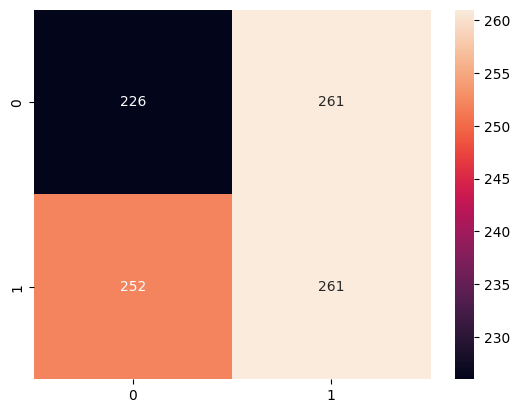

In [55]:
import seaborn as sns
from sklearn import metrics
y_pred = model_KNN.predict(X_test)
y_pred = (y_pred > 0.50)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "");

Building our Naive Bayes Model

In [56]:
from sklearn.naive_bayes import GaussianNB
naiveClassifier = GaussianNB()
nb_classifier = naiveClassifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

Accuracy 0.499


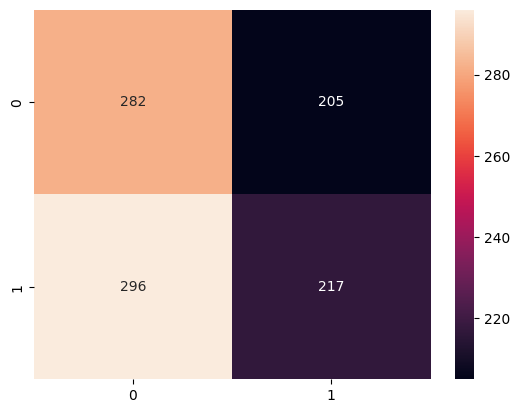

In [57]:
import seaborn as sns
from sklearn import metrics
y_pred = nb_classifier.predict(X_test)
y_pred = (y_pred > 0.50)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "");